In [3]:
import pandas as pd
import mplfinance as mpf
from Investar import Analyzer



In [4]:
def read_krx_code():
    """KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 반환"""
    url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
        'download&searchType=13'
    krx = pd.read_html(url, header=0)[0]
    krx = krx[['종목코드', '회사명']]
    krx = krx.rename(columns={'종목코드': 'code', '회사명': 'company'})
    krx.code = krx.code.map('{:06d}'.format)
    kosdaq = pd.read_excel('stock_list.xlsx')
    kosdaq = kosdaq[['종목코드', '회사명']]
    kosdaq = kosdaq.rename(columns={'종목코드': 'code', '회사명': 'company'})
    kosdaq.code = kosdaq.code.map('{:06d}'.format)
    frames = [krx,kosdaq]
    k_stock = pd.concat(frames)
    k_stock_2 = k_stock.drop_duplicates()
    k_stock_2.duplicated()
    #k_stock_2.code = k_stock_2.code.map('{:06d}'.format)

    return k_stock_2
    #return krx







In [5]:
stock_names =read_krx_code()

In [13]:
stock_names.code[0]

'004840'

In [9]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('095910', '2022-06-01', '2022-12-31')

/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  krx = pd.read_sql(sql, self.conn)
/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


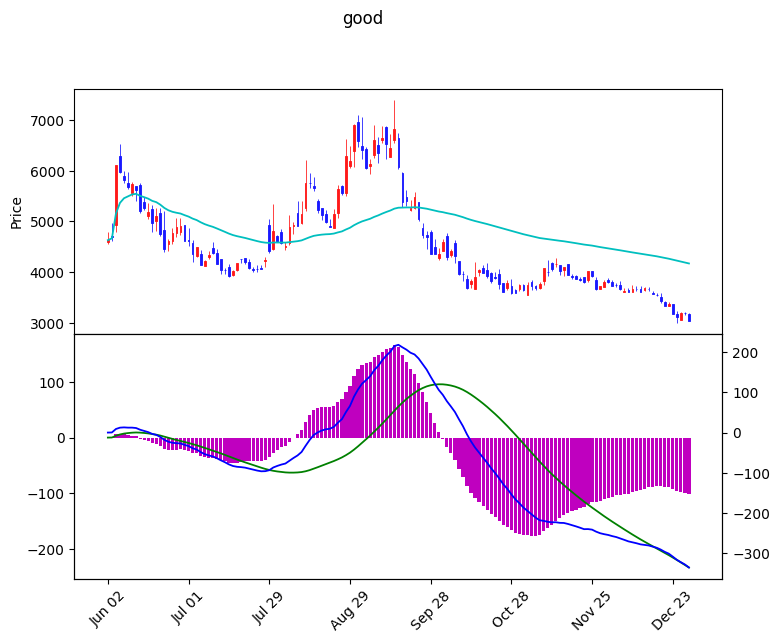

In [10]:
df.index = pd.to_datetime(df.index)
df = df[['open', 'high', 'low', 'close', 'volume']] 

ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
macd = ema60 - ema130                  # ③ MACD선
signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal               # ⑤ MACD 히스토그램

apds = [mpf.make_addplot(ema130, color='c'),
    mpf.make_addplot(macdhist, type='bar', panel=1, color='m'),
    mpf.make_addplot(macd, panel=1, color='b'),
    mpf.make_addplot(signal, panel=1, color='g'),
    ]
mc = mpf.make_marketcolors(up='r', down='b', inherit=True) 
stl = mpf.make_mpf_style(marketcolors=mc) 
mpf.plot(df, title='good', type='candle',
addplot=apds, figsize=(9,7), panel_ratios=(1,1), style=stl)

In [36]:
stock_names.code[501]

'357780'

In [ ]:
# 위의 케이스가 문제다.  왜 두개의 value 가 나오는 것인가? 

In [19]:
df = mk.get_daily_price(stock_names.code[0], '2022-06-01', '2022-12-31')

/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


In [17]:
type(stock_names.code[0])

str

In [14]:
def price_trend(num):
    mk = Analyzer.MarketDB()
    df = mk.get_daily_price(stock_names.code[num], '2022-06-01', '2022-12-31')
    df.index = pd.to_datetime(df.date)
    df = df[['open', 'high', 'low', 'close', 'volume']] 

    ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
    ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
    macd = ema60 - ema130                  # ③ MACD선
    signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
    macdhist = macd - signal               # ⑤ MACD 히스토그램

    apds = [mpf.make_addplot(ema130, color='c'),
        mpf.make_addplot(macdhist, type='bar', panel=1, color='m'),
        mpf.make_addplot(macd, panel=1, color='b'),
        mpf.make_addplot(signal, panel=1, color='g'),
        ]
    mc = mpf.make_marketcolors(up='r', down='b', inherit=True) 
    stl = mpf.make_mpf_style(marketcolors=mc) 
    mpf.plot(df, title=stock_names.company[num], type='candle',
    addplot=apds, figsize=(9,7), panel_ratios=(1,1), style=stl)
    return macdhist

/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  krx = pd.read_sql(sql, self.conn)
/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)
/Users/minsu/miniforge3/envs/finance/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minsu/miniforge3/envs/finance/lib/python3.10/site-packages/IPython/core/p

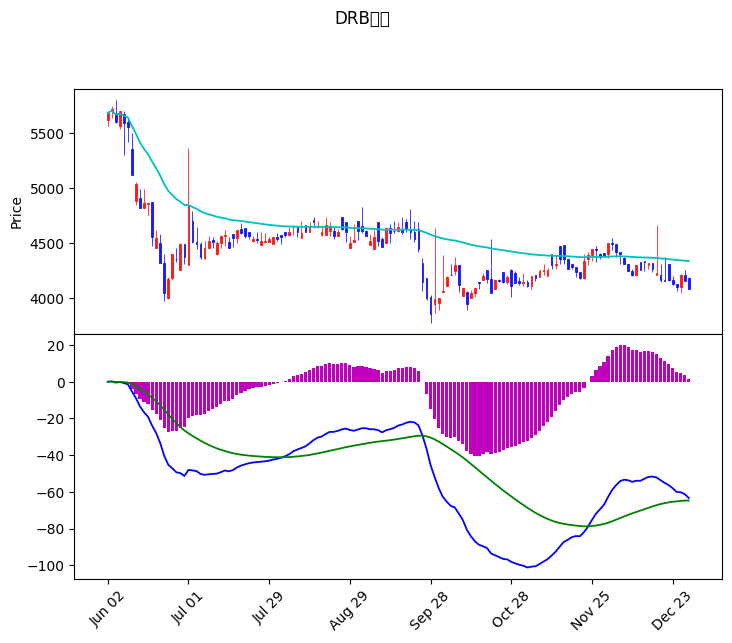

date
2022-06-02    0.000000
2022-06-03    0.087749
2022-06-07   -0.376753
2022-06-08   -0.013396
2022-06-09   -0.476988
                ...   
2022-12-23    7.369657
2022-12-26    5.057062
2022-12-27    4.719476
2022-12-28    3.517981
2022-12-29    1.379256
Name: close, Length: 145, dtype: float64

In [22]:
price_trend(0)